# Disney Donut Project - Project 1 Requirements

*  Use Pandas to clean and format your data set(s)

*  Create a Jupyter Notebook describing the data exploration and cleanup process

*  Create a Jupyter Notebook illustrating the final data analysis

*  Use Matplotlib to create a total of 6-8 visualizations of your data (ideally, at least 2 per "question" you ask of your data)

*  Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation

*  Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions

*  Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.

In [1]:
# Dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as sts 
import os

## Temperature - Collins

In [2]:
# Import CSV
csvfile = os.path.join("Resources", "avgtemp1901-2016.csv")
df_temp = pd.read_csv(csvfile)
df_temp.head

# Display columns
df_temp.columns

#Renaming columns 
data_temp = df_temp.rename(columns={"Temperature - (Celsius)":"Mean Temperature(Celcius)"," Statistics":"Months"," Year":"Year"})

data_temp

# Removing the average on the Months
sliced_column = data_temp['Months'].str.slice(stop = 4)
sliced_column
data_temp["Months"] = sliced_column
data_temp["Months"]

# Delete Redundant Columns
del data_temp[' Country']
del data_temp[' ISO3']

# Filter to 10 year Dataset
data_temp_1991 = data_temp.loc[data_temp['Year'] > 1990, :]

# Reset index
data_temp_1991_2016 = data_temp_1991.reset_index(drop=True)

# Group data by year and display stats
group_data_temp = data_temp_1991_2016.groupby(data_temp_1991_2016['Year'])
stats_temp = group_data_temp.describe()

# Mean for each year
mean_temperature = group_data_temp.mean()

# Reset Index
new_mean_temperature = mean_temperature.reset_index()

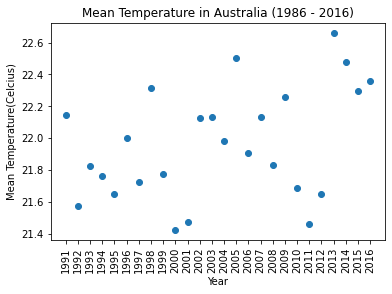

In [3]:
plt.scatter(new_mean_temperature['Year'],new_mean_temperature['Mean Temperature(Celcius)'])
plt.xlabel('Year')
plt.ylabel('Mean Temperature(Celcius)')
plt.title('Mean Temperature in Australia (1986 - 2016)')
plt.xticks(new_mean_temperature['Year'], rotation=90)
plt.savefig('Output/test.jpeg')

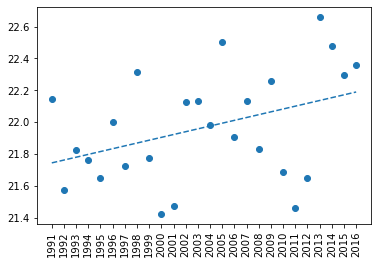

In [4]:
year = new_mean_temperature['Year']
m_temperature = new_mean_temperature['Mean Temperature(Celcius)']

# Perform a linear regression on year versus temperature
t_slope, t_int, t_r, t_p, t_std_err = sts.linregress(year, m_temperature)

# Create equation of line to calculate predicted violent crime rate
t_fit = t_slope * year + t_int

plt.scatter(year,m_temperature)
plt.plot(year,t_fit,"--")
plt.xticks(year, rotation=90)
plt.show()

In [5]:
years = [2017,2018,2019,2020]
temps=[]
for year in years:
    fit = round(t_slope * year + t_int,2)
    temps.append(fit)

# Create a DataFrame of frames using a dictionary of lists
new_temps = pd.DataFrame({'Year': years,
'Mean Temperature(Celcius)': temps})

# Append new dataframe to the previous Dataframe
mean_temp_1991_2020 = new_mean_temperature.append(new_temps, ignore_index=True)

Text(0.5, 1.0, 'Mean Temperature Vs Year')

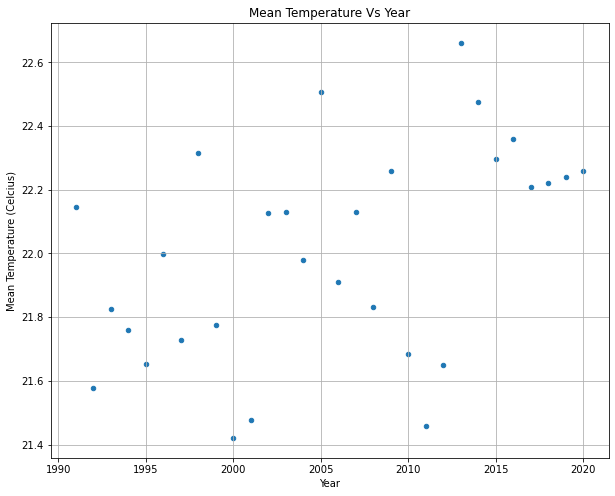

In [6]:
# Scatter graph for 1991 - 2020
mean_temp_1991_2020.plot(kind='scatter',x='Year',y='Mean Temperature(Celcius)',figsize = (10,8))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel("Mean Temperature (Celcius)")
plt.title("Mean Temperature Vs Year")

## Rainfall - Thierry

In [7]:
# Australia States Average Rainfall - Data and Plots

# CSV file paths
rf_nsw_act_file = os.path.join("Resources", "Rainfall_Total_1900_2020_NSW_ACT.csv")
rf_nt_file = os.path.join("Resources", "Rainfall_Total_1900_2020_NT.csv")
rf_qld_file = os.path.join("Resources", "Rainfall_Total_1900_2020_QLD.csv")
rf_sa_file = os.path.join("Resources", "Rainfall_Total_1900_2020_SA.csv")
rf_tas_file = os.path.join("Resources", "Rainfall_Total_1900_2020_TAS.csv")
rf_vic_file = os.path.join("Resources", "Rainfall_Total_1900_2020_VIC.csv")
rf_wa_file = os.path.join("Resources", "Rainfall_Total_1900_2020_WA.csv")

# Read CSV files
rf_nsw_act_data = pd.read_csv(rf_nsw_act_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_nt_data = pd.read_csv(rf_nt_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_qld_data = pd.read_csv(rf_qld_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_sa_data = pd.read_csv(rf_sa_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_tas_data = pd.read_csv(rf_tas_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_vic_data = pd.read_csv(rf_vic_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_wa_data = pd.read_csv(rf_wa_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])

# Clean year column and rearrange columns
rf_nsw_act_data["Year"] = rf_nsw_act_data.index.astype(str).str[:4]
rf_nsw_act_data = rf_nsw_act_data.reset_index()
rf_nsw_act_data = rf_nsw_act_data[["Year","Rainfall Total (mm)"]]
rf_nt_data["Year"] = rf_nt_data.index.astype(str).str[:4]
rf_nt_data = rf_nt_data.reset_index()
rf_nt_data = rf_nt_data[["Year","Rainfall Total (mm)"]]
rf_qld_data["Year"] = rf_qld_data.index.astype(str).str[:4]
rf_qld_data = rf_qld_data.reset_index()
rf_qld_data = rf_qld_data[["Year","Rainfall Total (mm)"]]
rf_sa_data["Year"] = rf_sa_data.index.astype(str).str[:4]
rf_sa_data = rf_sa_data.reset_index()
rf_sa_data = rf_sa_data[["Year","Rainfall Total (mm)"]]
rf_tas_data["Year"] = rf_tas_data.index.astype(str).str[:4]
rf_tas_data = rf_tas_data.reset_index()
rf_tas_data = rf_tas_data[["Year","Rainfall Total (mm)"]]
rf_vic_data["Year"] = rf_vic_data.index.astype(str).str[:4]
rf_vic_data = rf_vic_data.reset_index()
rf_vic_data = rf_vic_data[["Year","Rainfall Total (mm)"]]
rf_wa_data["Year"] = rf_wa_data.index.astype(str).str[:4]
rf_wa_data = rf_wa_data.reset_index()
rf_wa_data = rf_wa_data[["Year","Rainfall Total (mm)"]]

# Combine seperate dataframes into combined dataframe
rf_states_df = rf_nsw_act_data
rf_states_df = rf_states_df.rename(columns={"Rainfall Total (mm)":"NSW/ACT"})
rf_states_df["NT"] = rf_nt_data["Rainfall Total (mm)"]
rf_states_df["QLD"] = rf_qld_data["Rainfall Total (mm)"]
rf_states_df["SA"] = rf_sa_data["Rainfall Total (mm)"]
rf_states_df["TAS"] = rf_tas_data["Rainfall Total (mm)"]
rf_states_df["VIC"] = rf_vic_data["Rainfall Total (mm)"]
rf_states_df["WA"] = rf_wa_data["Rainfall Total (mm)"]

# Convert string to integer for Year column
rf_states_df["Year"] = rf_states_df["Year"].astype("int")

# Filter data for 1991 onwards
rf_states_df = rf_states_df.loc[rf_states_df['Year'] > 1990, :]

Text(0, 0.5, 'Total Rainfall (mm)')

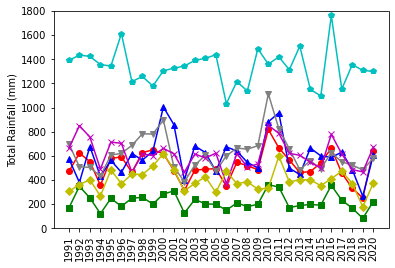

In [8]:
# print combined plot for all states
plt.plot(rf_states_df["Year"], rf_states_df["NSW/ACT"], marker="o", color="r")
plt.plot(rf_states_df["Year"], rf_states_df["NT"], marker="^", color="b")
plt.plot(rf_states_df["Year"], rf_states_df["QLD"], marker="v", color="gray")
plt.plot(rf_states_df["Year"], rf_states_df["SA"], marker="s", color="g")
plt.plot(rf_states_df["Year"], rf_states_df["TAS"], marker="p", color="c")
plt.plot(rf_states_df["Year"], rf_states_df["VIC"], marker="x", color="m")
plt.plot(rf_states_df["Year"], rf_states_df["WA"], marker="D", color="y")
plt.xticks(rf_states_df["Year"], rotation=90)
plt.ylim(0,1800)
plt.ylabel("Total Rainfall (mm)")

In [9]:
# Australia Average Rainfall - Data and Plots

# Read CSV from file
rf_au_data = pd.read_csv(os.path.join("Resources","pr_1901_2016_AUS.csv"))

# Group by year to generate the yearly average
rf_au_gb = rf_au_data.groupby([" Year"]).sum()
rf_au_df = rf_au_gb
rf_au_df = rf_au_df.rename(columns={"Rainfall - (MM)":"Average Rainfall (mm)"})
rf_au_df["Year"] = rf_au_df.index
rf_au_df = rf_au_df.reset_index()
rf_au_df = rf_au_df[["Year", "Average Rainfall (mm)"]]

# Filter data for 1991 onwards
rf_au_df = rf_au_df.loc[rf_au_df['Year'] > 1990, :]

Text(0, 0.5, 'Average Rainfall (mm)')

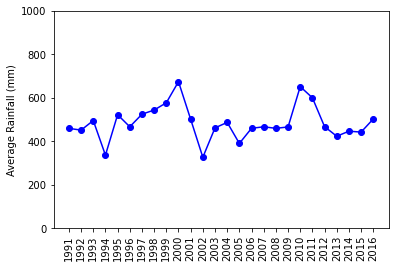

In [10]:
# Print plot for Australia average rainfall
plt.plot(rf_au_df["Year"], rf_au_df["Average Rainfall (mm)"], marker="o", color="blue")
plt.xticks(rf_au_df["Year"], rotation=90)
plt.ylim(0,1000)
plt.ylabel("Average Rainfall (mm)")

In [11]:
# Australia Average Rainfall - Linear regression
year_au = rf_au_df['Year']
rf_au = rf_au_df["Average Rainfall (mm)"]

rf_slope, rf_int, rf_r, rf_p, rf_std_err = sts.linregress(year_au, rf_au)
rf_fit = rf_slope * year_au + rf_int

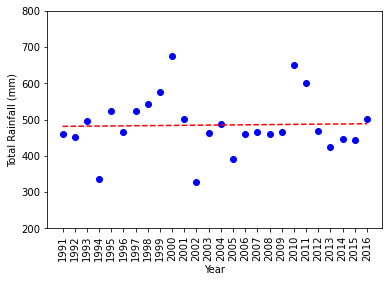

In [12]:
# Print plot for Australia average rainfall including linear regression
plt.scatter(year_au,rf_au, color="blue")
plt.plot(year_au,rf_fit,"--",color="red")
plt.xticks(year_au, rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.ylim(200,800)
plt.show()

In [13]:
# Use linear regression to extrapolate data to 2020
years_regression = [2017,2018,2019,2020]
rf_regression = []
for year in years_regression:
    rf_fit = round(rf_slope * year + rf_int,2)
    rf_regression.append(rf_fit)

# Create a DataFrame to add average rainfall data from states data to Australia data
new_rf_au_df = pd.DataFrame({'Year':years_regression,'Average Rainfall (mm)':rf_regression})

# Combine the dataframes
combined_rf_au_df = rf_au_df.append(new_rf_au_df, ignore_index=True)

Text(0, 0.5, 'Average Rainfall (mm)')

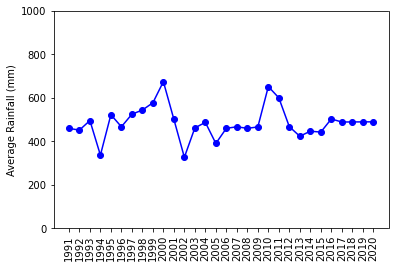

In [14]:
# print plot for Australia average rainfall
plt.plot(combined_rf_au_df["Year"], combined_rf_au_df["Average Rainfall (mm)"], marker="o", color="blue")
plt.xticks(combined_rf_au_df["Year"], rotation=90)
plt.ylim(0,1000)
plt.ylabel("Average Rainfall (mm)")

## Emissions - Jim

In [15]:
# Save file path to variable
carbon_dioxide_csv = os.path.join("Resources", "CapeGrim_CO2_data_download.csv")
methane_csv = os.path.join("Resources","CapeGrim_CH4_data_download.csv")
nitrous_oxide_csv = os.path.join("Resources","CapeGrim_N2O_data_download.csv")

# Import emissions data
carbon_dioxide_df = pd.read_csv(carbon_dioxide_csv) 
methane_df = pd.read_csv(methane_csv)
nitrous_oxide_df = pd.read_csv(nitrous_oxide_csv) 

nitrous_oxide_df.head()

,YYYY,MM,DD,DATE,N2O(ppb),SD(ppb),Source
0,1978,4,26,1978.3178,299.19,0.23,Cape Grim air archive
1,1978,7,7,1978.5151,299.55,0.19,Cape Grim air archive
2,1980,9,3,1980.6749,301.66,0.07,Cape Grim air archive
3,1981,10,5,1981.7616,301.84,0.11,Cape Grim air archive
4,1984,5,23,1984.3934,302.98,0.11,Cape Grim air archive


In [16]:
# Calculate central tendencies for each year
# Methane
methane_gb = methane_df.groupby('YYYY')
emissions_df = methane_gb.agg(['mean','median'])
emissions_df = emissions_df.reset_index()
emissions_df = emissions_df[['YYYY', 'CH4(ppb)']]

# Carbon Dioxide
carbon_dioxide_gb = carbon_dioxide_df.groupby('YYYY')
cd_df = carbon_dioxide_gb.agg(['mean','median'])
cd_df = cd_df.reset_index()
cd_df = cd_df[['YYYY', 'CO2(ppm)']]
emissions_df = pd.merge(emissions_df, cd_df, how='outer', on='YYYY')

# Nitrous Oxide
nitrous_oxide_gb = nitrous_oxide_df.groupby('YYYY')
no_df = nitrous_oxide_gb.agg(['mean','median'])
no_df = no_df.reset_index()
no_df = no_df[['YYYY', 'N2O(ppb)']]
emissions_df = pd.merge(emissions_df, no_df, how='outer', on='YYYY')

# Clean up dataframe and sort by year - filter 1991 onwards
emissions_df = emissions_df.sort_values(by='YYYY', ascending=True)
emissions_df = emissions_df.loc[emissions_df['YYYY'] > 1990, :]
emissions_df = emissions_df.reset_index()
del emissions_df['index']
emissions_df.rename(columns = {'YYYY': 'Year'}, inplace = True)

emissions_df.head()

Year     CH4(ppb)              CO2(ppm)              N2O(ppb)          
                mean    median        mean    median        mean    median
0  1991  1674.079167  1678.190  352.691000  352.7570  308.670000  308.6700
1  1992  1687.101667  1688.000  354.173083  354.3655  309.294111  309.3160
2  1993  1688.873333  1690.740  354.921250  354.8900  309.255000  309.2540
3  1994  1694.108333  1697.095  356.364583  356.3470  309.914333  310.0640
4  1995  1700.219167  1701.975  358.399583  358.3705  310.465833  310.3665

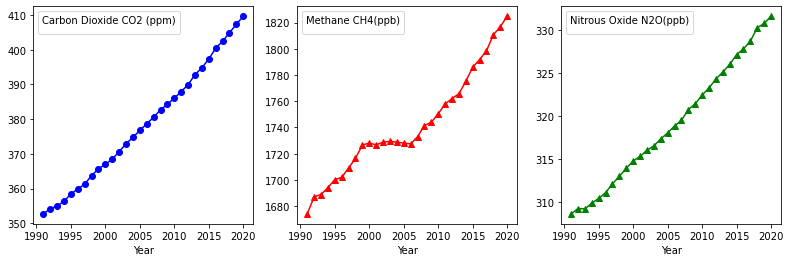

In [17]:
# methane_dioxide_df.plot()
plt.figure(1,figsize=[13.4, 4.0])

plt.subplot(131)
plt.plot(emissions_df["Year"], emissions_df['CO2(ppm)']['mean'], marker ='o', color='blue', label="Methane")
plt.legend(labels="", title = "Carbon Dioxide CO2 (ppm)")
plt.xlabel('Year')

plt.subplot(132)
plt.plot(emissions_df["Year"], emissions_df['CH4(ppb)']['mean'], marker='^', color='red', label="Carbon Dioxide")
plt.xlabel('Year')
plt.legend(labels="", title = "Methane CH4(ppb)")

plt.subplot(133)
plt.plot(emissions_df["Year"], emissions_df['N2O(ppb)']['mean'], marker='^', color='green', label="Nitrous Oxide")
plt.xlabel('Year')
plt.legend(labels="", title = "Nitrous Oxide N2O(ppb)")

plt.show()

### Emissions vs Temperatue - Jim

The correlation between CO2 emissions and Temperature factors is 0.41



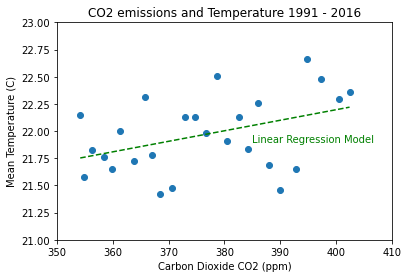

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for temperature and CO2 emmsions - 1990 -> 2020

# Remove first and last 3 rows of emissions to match temperature data set
emissions_df2 = emissions_df[1:]
emissions_df2 = emissions_df2[:-3]

correlation = sts.pearsonr(emissions_df2['CO2(ppm)']['mean'], new_mean_temperature['Mean Temperature(Celcius)'])
m_slope, m_int, m_r, m_p, m_std_err = sts.linregress(emissions_df2['CO2(ppm)']['mean'], new_mean_temperature['Mean Temperature(Celcius)'])
m_fit = m_slope * emissions_df2['CO2(ppm)']['mean'] + m_int

print(f"The correlation between CO2 emissions and Temperature factors is {round(correlation[0],2)}")
print()

plt.scatter(emissions_df2['CO2(ppm)']['mean'], new_mean_temperature['Mean Temperature(Celcius)'])
plt.plot(emissions_df2['CO2(ppm)']['mean'],m_fit,"--",color='g')
plt.xlabel('Carbon Dioxide CO2 (ppm)')
plt.ylabel('Mean Temperature (C)')
plt.title('CO2 emissions and Temperature 1991 - 2016')
plt.xlim(350,410)
plt.ylim(21,23)
plt.text(385,21.90,'Linear Regression Model', color='g')
plt.show()

## Deforestation - Spyro

In [ ]:
# A forest is defined in this dataset as "An area, incorporating all living and non-living components, that is dominated by trees having usually a single stem and a mature or potentially mature stand height exceeding two metres and with existing or potential crown cover of overstorey​ strata about equal to or greater than 20 per cent. This includes Australia's diverse native forests and commercial plantations, regardless of age. It is also sufficiently broad to encompass areas of trees that are sometimes described as woodlands".

Deforestation_path = os.path.join("Resources","Deforestation.xlsx")
deforestation_data = pd.read_excel(Deforestation_path)

# deforestation_data
deforestation_years = deforestation_data["Year"]
deforestation_area = deforestation_data["Forest area (million hectares)"]

# Delete Redundant Columns
del deforestation_data['Unnamed: 2']

# plt.boxplot(deforestation_area) confirms no outliers
plt.plot(deforestation_years, deforestation_area, color="green", marker="o")

## Combine datasets - Collins

In [ ]:
# Combine all datasets
combined1_df = pd.merge(combined_rf_au_df,mean_temp_1991_2020,how='outer', on='Year')
combined2_df = combined1_df.merge(deforestation_data, on='Year')
combined_df = combined2_df.merge(emissions_df, on='Year')
combined_df.head()

## Bushfires - Vanessa

In [ ]:
# read data as csv
csvfile = os.path.join('Resources','bushfire_data.csv')
bushfire_data = pd.read_csv(csvfile)
bushfire_data.head()

In [ ]:
# check data that has number is a 'float', i.e. every variable except 'year', 'description' and 'state' should be a float
bushfire_data.dtypes

In [ ]:
# check why variables are not a float 

# approx_value_loss
bushfire_data['approx value loss'].unique()

# a check of approx_value_loss suggests there is a data point that was included with a '£' 
# will leave for now because the value loss is reflected as the dollar value for that year and needs to be escalated by CPI to (at least) 2020 for analysis 